## AirbnbDataset

In [1]:
import covid19_dataset
import airbnb_dataset
import pandas as pd

In [2]:
myABData = airbnb_dataset.AirbnbDataset()

In [3]:
## get basic information regarding the dataset
print(f'Number of us states with data available is {myABData.get_num_us_states()}')
print(f'These states are: {myABData.us_states}\n')

print(f'Number of countries with data available is {myABData.get_num_countries()}')
print(f'These countries are: {myABData.countries}\n')

state = 'California'
print(f'Cities in state {state} are {myABData.us_state_city_mapper[state]}\n')
country = 'China'
print(f'Representative city in country {country} is {myABData.country_to_city_map[country]}')

Number of us states with data available is 19
These states are: ['North Carolina', 'Texas', 'Massachusetts', 'Florida', 'Illinois', 'Nevada', 'Ohio', 'Colorado', 'Hawaii', 'New Jersey', 'California', 'Tennessee', 'Louisiana', 'New York', 'Oregon', 'Rhode Island', 'Washington', 'Minnesota', 'District of Columbia']

Number of countries with data available is 15
These countries are: ['Germany', 'Spain', 'Greece', 'Sweden', 'United Kingdom', 'China', 'Singapore', 'Japan', 'South Africa', 'Australia', 'Canada', 'United States', 'Mexico', 'Brazil', 'Argentina']

Cities in state California are ['Los Angeles', 'Oakland', 'Pacific Grove', 'San Diego', 'San Francisco', 'San Mateo County', 'Santa Clara County', 'Santa Cruz County']

Representative city in country China is Shanghai


In [4]:
# get number of reviews per month for a specific city
city = 'Shanghai'
df = myABData.get_reviews_for_city(city)
df

City Shanghai is in country China


size
year month       
2010 9          1
2011 3          1
     7          4
     8          1
     9          3
...           ...
2020 6       9940
     7      13033
     8      16163
     9      14852
     10     11711

[114 rows x 1 columns]

Default returned data for all get_ functions are per month data. 
Set arguments **per_month = False, per_week = True** to get per week data. 

In [5]:
# get number of reviwes per week for a specific city
df = myABData.get_reviews_for_city(city, per_month = False, per_week = True)
df

City Shanghai is in country China


size
year week      
2010 38       1
2011 9        1
     26       1
     29       1
     30       2
...         ...
2020 39    3116
     40    4637
     41    4314
     42    2492
     43    1654

[456 rows x 1 columns]

In [6]:
# get total number of reviews per week for multiple cities
cities = ['Boston', 'Cambridge']
df = myABData.get_total_reviews_for_cities(cities, per_month = False, per_week = True)
df

City Boston is in country United States .
City Cambridge is in country United States .


size
year week      
2009 46       2
     48       2
2010 9        2
     18       2
     20       3
...         ...
2020 39     496
     40     526
     41     550
     42     502
     43     182

[491 rows x 1 columns]

If you want the total number of reviews for all cities in a State, instead of using **get_total_reviews_for_cities**, you can use **get_reviews_for_us_state**

In [7]:
# get total number of reviews per week for state
state = "Massachusetts"
df = myABData.get_reviews_for_us_state(state, per_month = False, per_week = True)
df

City Boston is in country United States .
City Cambridge is in country United States .


size
year week      
2009 46       2
     48       2
2010 9        2
     18       2
     20       3
...         ...
2020 39     496
     40     526
     41     550
     42     502
     43     182

[491 rows x 1 columns]

The result is the same as previous one. Since in Massachusetts, only Boston and Cambridge are available

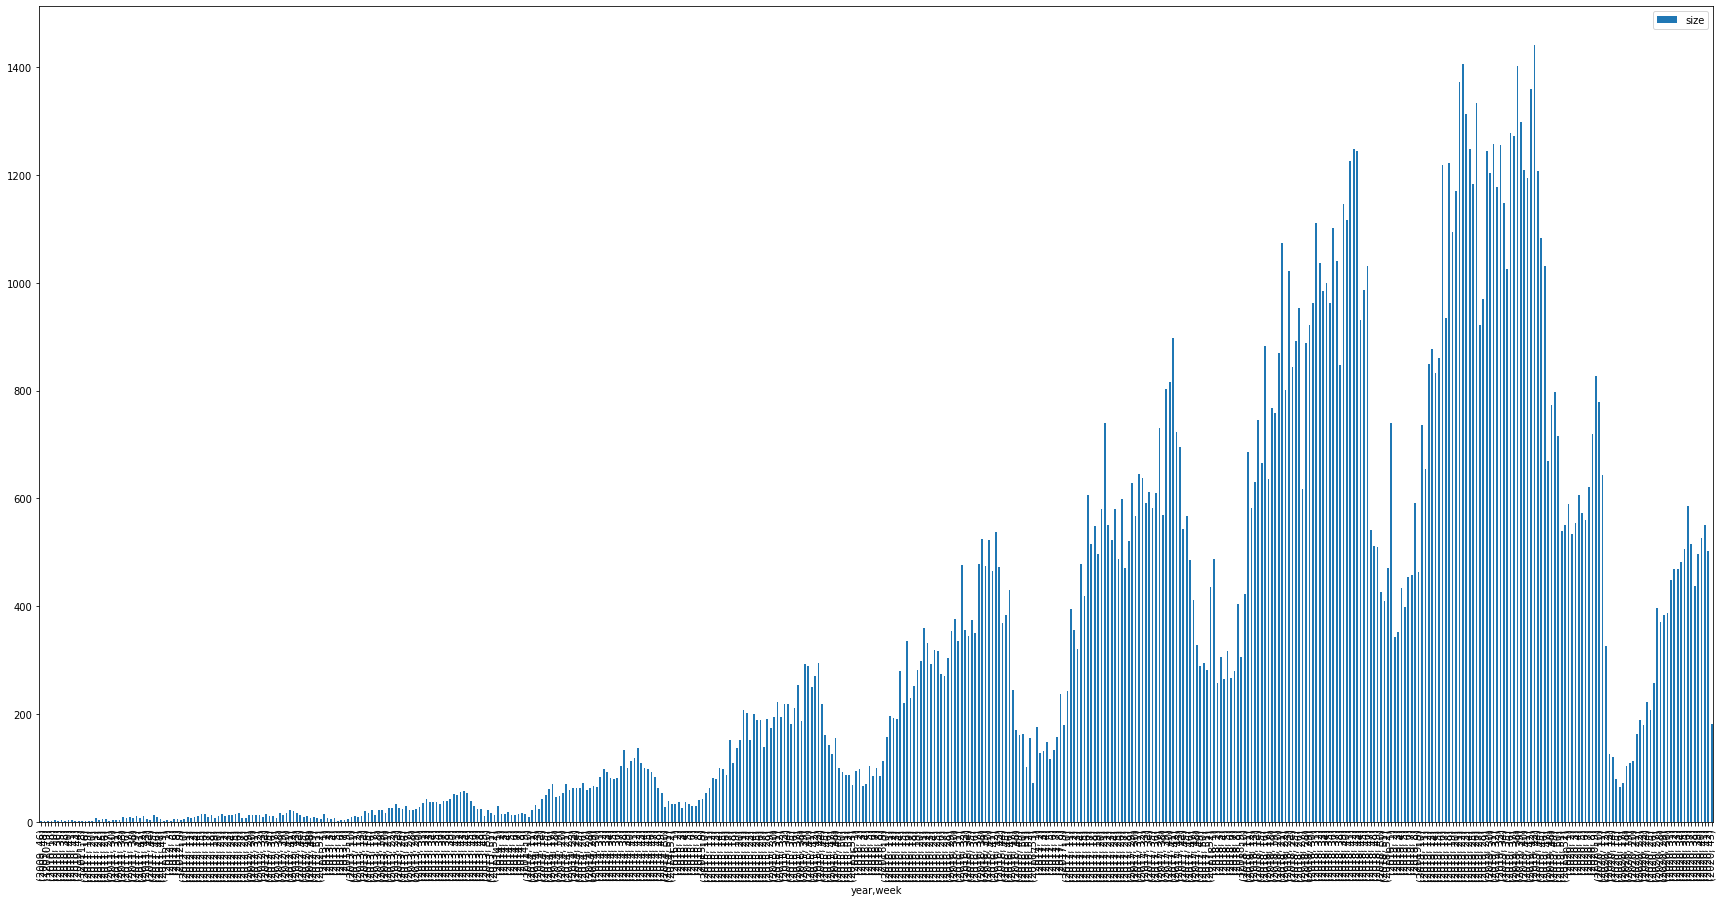

In [8]:
df.plot(kind='bar',figsize=(30,15))

### Country level
Countries are selected with these objectives in mind:   
- Every continent has at least one country. 
- Countries should as sparse as possible to cover most of the area on the earth.
- Each country is represented by one city. This city is either the capital or the most popular city among travallers in this country


In [9]:
# get the representative city for certain country
country = 'Germany'
print(f'Country {country} is represented by the city {myABData.country_to_city_map[country]}\n')

# get which country the city belongs to
city = 'Buenos Aires'
print(f'City {city} represents country {myABData.city_to_country_map[city]}')

Country Germany is represented by the city Munich

City Buenos Aires represents country Argentina


In [10]:
# get the number of reviews per week for the country
country = 'China'
df = myABData.get_reviews_for_country(country, per_month = False, per_week = True)
df

City Shanghai is in country China


size
year week      
2010 38       1
2011 9        1
     26       1
     29       1
     30       2
...         ...
2020 39    3116
     40    4637
     41    4314
     42    2492
     43    1654

[456 rows x 1 columns]

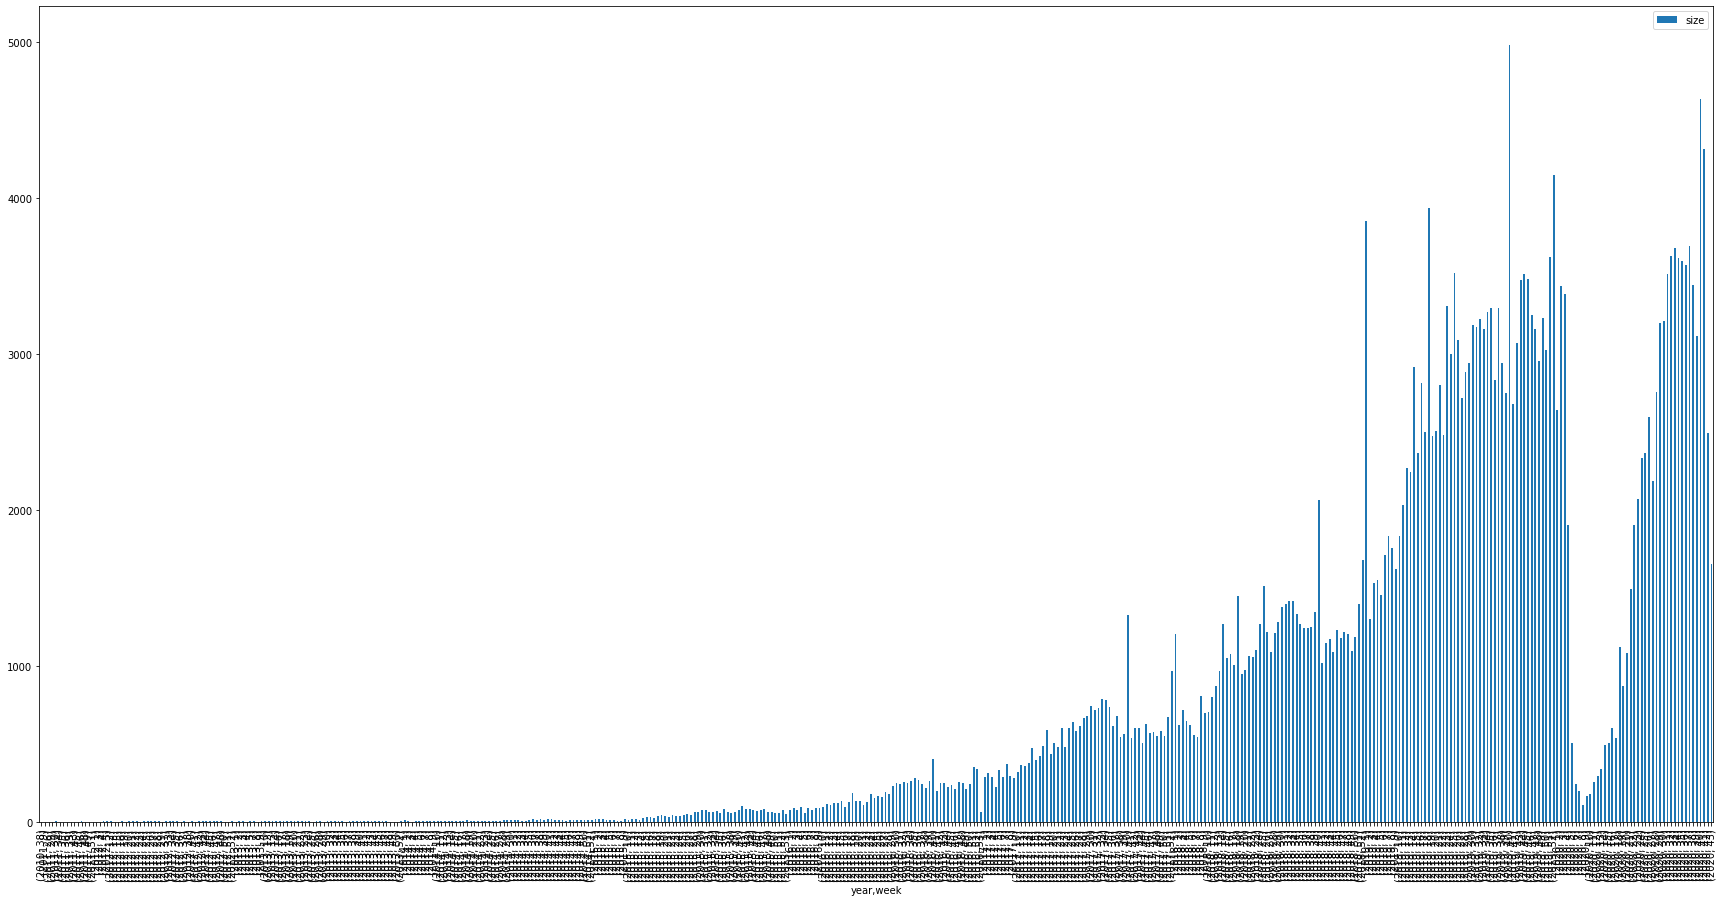

In [11]:
df.plot(kind = 'bar', figsize=(30,15))

## CovidDataset

In [12]:
import covid19_dataset

In [15]:
myCovidDataset = covid19_dataset.COVID19Dataset()

All data loaded and preprocessed.


All data frames are cleaned and renamed. So columns names may be different with the original .csv file. All 'date' columns are pandas datatime

### Country level data

In [16]:
# Get a set of countries where data is available
check_country = "Singapore"
countries = myCovidDataset.get_available_countries()
print(f"Number of countries in dataset is {len(countries)}")
print(f"Country {check_country} in dataset: {check_country in countries}")

Number of countries in dataset is 216
Country Singapore in dataset: True


In [18]:
# You can get the worldwide data in one data frame
myCovidDataset.get_data_worldwide()

,continent,location,date,total_cases,new_cases,death,death_increase
0,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0
1,North America,Aruba,2020-03-19,NaN,NaN,NaN,NaN
2,North America,Aruba,2020-03-20,4.0,2.0,NaN,0.0
3,North America,Aruba,2020-03-21,NaN,NaN,NaN,NaN
4,North America,Aruba,2020-03-22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
57175,NaN,International,2020-11-12,696.0,NaN,7.0,NaN
57176,NaN,International,2020-11-13,696.0,NaN,7.0,NaN
57177,NaN,International,2020-11-14,696.0,NaN,7.0,NaN
57178,NaN,International,2020-11-15,696.0,NaN,7.0,NaN


In [19]:
# Get particular countries data per day
myCovidDataset.get_data_for_country("Singapore")

,continent,location,total_cases,new_cases,death,death_increase
date,,,,,,
2019-12-31,Asia,Singapore,NaN,0.0,NaN,0.0
2020-01-01,Asia,Singapore,NaN,0.0,NaN,0.0
2020-01-02,Asia,Singapore,NaN,0.0,NaN,0.0
2020-01-03,Asia,Singapore,NaN,0.0,NaN,0.0
2020-01-04,Asia,Singapore,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...
2020-11-12,Asia,Singapore,58091.0,18.0,28.0,0.0
2020-11-13,Asia,Singapore,58102.0,11.0,28.0,0.0
2020-11-14,Asia,Singapore,58114.0,12.0,28.0,0.0


In [20]:
# Get particular countries data per week
myCovidDataset.get_data_for_country("Singapore", per_day = False, per_week = True)

total_cases  new_cases  death  death_increase
year week                                               
2019 1             0.0        0.0    0.0             0.0
2020 1             0.0        0.0    0.0             0.0
     2             0.0        0.0    0.0             0.0
     3             0.0        0.0    0.0             0.0
     4            10.0        4.0    0.0             0.0
     5            73.0       14.0    0.0             0.0
     6           191.0       22.0    0.0             0.0
     7           382.0       32.0    0.0             0.0
     8           577.0       17.0    0.0             0.0
     9           659.0       13.0    0.0             0.0
     10          821.0       36.0    0.0             0.0
     11         1255.0       76.0    0.0             0.0
     12         2210.0      218.0    2.0             2.0
     13         4219.0      371.0   15.0             1.0
     14         6919.0      386.0   29.0             3.0
     15        11905.0     1110.0   44.0             2.0
     16        27870.0     3693.0   69.0             3.0
     17        69814.0     6701.0   81.0             1.0
     18       109457.0     4855.0  102.0             5.0
     19       141697.0     4912.0  134.0             3.0
     20       177485.0     4896.0  147.0             2.0
     21       205845.0     3712.0  157.0             1.0
     22       230270.0     3298.0  161.0             0.0
     23       254049.0     3161.0  168.0             2.0
     24       273119.0     2670.0  176.0             1.0
     25       288528.0     1636.0  182.0             0.0
     26       298400.0     1413.0  182.0             0.0
     27       308602.0     1418.0  182.0             0.0
     28       316903.0     1119.0  182.0             0.0
     29       327985.0     1872.0  187.0             1.0
     30       341486.0     2233.0  189.0             0.0
     31       360461.0     2624.0  189.0             0.0
     32       377757.0     2417.0  189.0             0.0
     33       387882.0      732.0  189.0             0.0
     34       392135.0      605.0  189.0             0.0
     35       395642.0      451.0  189.0             0.0
     36       398093.0      265.0  189.0             0.0
     37       400224.0      375.0  189.0             0.0
     38       402495.0      201.0  189.0             0.0
     39       403452.0      127.0  189.0             0.0
     40       404277.0      115.0  189.0             0.0
     41       404875.0       66.0  189.0             0.0
     42       405226.0       38.0  195.0             1.0
     43       405537.0       61.0  196.0             0.0
     44       405922.0       50.0  196.0             0.0
     45       406248.0       39.0  196.0             0.0
     46       406616.0       62.0  196.0             0.0
     47        58119.0        3.0   28.0             0.0

## State level data

In [21]:
# You can get the us states data in one data frame
myCovidDataset.get_data_statelevel()

,continent,location,date,total_cases,new_cases,death,death_increase
0,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0
1,North America,Aruba,2020-03-19,NaN,NaN,NaN,NaN
2,North America,Aruba,2020-03-20,4.0,2.0,NaN,0.0
3,North America,Aruba,2020-03-21,NaN,NaN,NaN,NaN
4,North America,Aruba,2020-03-22,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
57175,NaN,International,2020-11-12,696.0,NaN,7.0,NaN
57176,NaN,International,2020-11-13,696.0,NaN,7.0,NaN
57177,NaN,International,2020-11-14,696.0,NaN,7.0,NaN
57178,NaN,International,2020-11-15,696.0,NaN,7.0,NaN


In [22]:
# Ger particular state data per day. Please use two letter postal code for the state. 
# Check https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes
# for the postal code. 
myCovidDataset.get_data_for_state("CA")

,state,death,death_increase,total_cases,new_cases,total_test_results,total_test_results_increase
date,,,,,,,
2020-11-16,CA,18263.0,10,1029235.0,9890,21068894.0,202109
2020-11-15,CA,18253.0,35,1019345.0,10968,20866785.0,195189
2020-11-14,CA,18218.0,81,1008377.0,9875,20671596.0,193096
2020-11-13,CA,18137.0,29,998502.0,6893,20478500.0,136428
2020-11-12,CA,18108.0,38,991609.0,6927,20342072.0,119979
...,...,...,...,...,...,...,...
2020-03-08,CA,NaN,0,88.0,19,550.0,19
2020-03-07,CA,NaN,0,69.0,9,531.0,9
2020-03-06,CA,NaN,0,60.0,7,522.0,7


In [23]:
myCovidDataset.get_data_for_state("CA", per_day = False, per_week = True)

death  death_increase  total_cases  new_cases  \
year week                                                     
2020 10         0.0               0        323.0         35   
     11        18.0               5       1353.0        205   
     12       119.0              22       6231.0       1243   
     13       487.0              96      23426.0       4172   
     14      1492.0             196      67440.0       7730   
     15      3452.0             332     127348.0       8356   
     16      6379.0             515     183116.0       8539   
     17     10222.0             544     259559.0      11831   
     18     13892.0             505     340167.0      11452   
     19     17495.0             530     424331.0      13064   
     20     21156.0             516     512194.0      12159   
     21     24726.0             513     604264.0      13871   
     22     27903.0             439     713315.0      17873   
     23     30990.0             413     843539.0      18229   
     24     34002.0             437     976761.0      20043   
     25     36987.0             432    1131675.0      24969   
     26     40049.0             410    1365057.0      37419   
     27     43076.0             426    1698278.0      54742   
     28     46871.0             686    2072870.0      54819   
     29     51454.0             668    2495701.0      63888   
     30     56285.0             731    2965892.0      68967   
     31     62172.0             940    3390787.0      55503   
     32     68954.0             937    3727393.0      44998   
     33     75650.0             931    4151845.0      67402   
     34     81736.0             910    4515177.0      42107   
     35     87795.0             771    4786944.0      36240   
     36     93283.0             804    5022777.0      32235   
     37     97972.0             620    5206950.0      22779   
     38    102883.0             658    5369321.0      23477   
     39    107124.0             600    5538713.0      23908   
     40    111108.0             533    5697442.0      21421   
     41    114407.0             444    5849231.0      22850   
     42    117221.0             379    6009155.0      20738   
     43    120096.0             402    6181080.0      30712   
     44    122637.0             322    6392282.0      28505   
     45    124693.0             296    6622576.0      38105   
     46    126764.0             290    6951584.0      54706   
     47     18263.0              10    1029235.0       9890   

           total_test_results  total_test_results_increase  
year week                                                   
2020 10                2633.0                           35  
     11                7313.0                          659  
     12               71938.0                        11631  
     13              141224.0                        13417  
     14              384710.0                        90276  
     15             1084834.0                        73795  
     16             1648156.0                        90572  
     17             3064316.0                       245184  
     18             4415277.0                       189667  
     19             5923192.0                       239913  
     20             7743785.0                       279579  
     21             9998059.0                       347502  
     22            12536872.0                       362103  
     23            15307120.0                       417370  
     24            18244527.0                       439778  
     25            21587825.0                       517260  
     26            25785435.0                       636696  
     27            30503070.0                       724186  
     28            35622363.0                       726461  
     29            41426273.0                       880253  
     30            47525346.0                       881287  
     31            53599353.0                       867836  
     32            59530800.0

## City level data

In [24]:
# You can get the California all counties' data in one data frame
myCovidDataset.get_data_citylevel()

,county,total_cases,death,new_cases,death_increase,date
0,Santa Clara,151.0,6.0,151,6,2020-03-18
1,Santa Clara,183.0,8.0,32,2,2020-03-19
2,Santa Clara,246.0,8.0,63,0,2020-03-20
3,Santa Clara,269.0,10.0,23,2,2020-03-21
4,Santa Clara,284.0,13.0,15,3,2020-03-22
...,...,...,...,...,...,...
14520,Yolo,3606.0,64.0,33,0,2020-11-11
14521,Yolo,3646.0,64.0,40,0,2020-11-12
14522,Yolo,3716.0,66.0,70,2,2020-11-13
14523,Yolo,3765.0,66.0,49,0,2020-11-14


In [25]:
# Get particular city's data per day. 
myCovidDataset.get_data_for_city('San Diego')

,county,total_cases,death,new_cases,death_increase
date,,,,,
2020-03-18,San Diego,40.0,0.0,40,0
2020-03-19,San Diego,68.0,0.0,28,0
2020-03-20,San Diego,98.0,0.0,30,0
2020-03-21,San Diego,119.0,0.0,21,0
2020-03-22,San Diego,159.0,0.0,40,0
...,...,...,...,...,...
2020-11-11,San Diego,61746.0,915.0,661,0
2020-11-12,San Diego,62336.0,918.0,590,3
2020-11-13,San Diego,62978.0,921.0,642,3


In [26]:
myCovidDataset.get_data_for_city('San Diego', per_day = False, per_week = True)

total_cases   death  new_cases  death_increase
year week                                                
2020 12          484.0     0.0        159               0
     13         2368.0    26.0        362               7
     14         6813.0    97.0        807              12
     15        11288.0   289.0        478              36
     16        14529.0   526.0        464              28
     17        18719.0   796.0        775              40
     18        24945.0   994.0        884              27
     19        31306.0  1292.0        999              44
     20        37930.0  1587.0        910              48
     21        44135.0  1829.0        865              33
     22        49882.0  2105.0        780              37
     23        55981.0  2184.0        995               0
     24        63081.0  2200.0        964               8
     25        70928.0  2309.0       1354              18
     26        84556.0  2454.0       2537              23
     27       106410.0  2636.0       3395              26
     28       128992.0  2871.0       3201              35
     29       153831.0  3199.0       3755              56
     30       179172.0  3572.0       3302              55
     31       200989.0  3881.0       2899              32
     32       219603.0  4067.0       2864              29
     33       236285.0  4293.0       1931              32
     34       249775.0  4513.0       1862              34
     35       262587.0  4703.0       1760              22
     36       276947.0  4874.0       2350              22
     37       291951.0  5048.0       2029              30
     38       306023.0  5255.0       1898              26
     39       320049.0  5391.0       2033              16
     40       332825.0  5527.0       1826              27
     41       346653.0  5713.0       2115              23
     42       360705.0  5913.0       1806              27
     43       375409.0  6041.0       2240              17
     44       391933.0  6183.0       2523              21
     45       410933.0  6323.0       3077              17
     46       437202.0  6429.0       4571              18